In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('FinalData.csv')
df.drop(df.columns[0], axis=1, inplace=True)

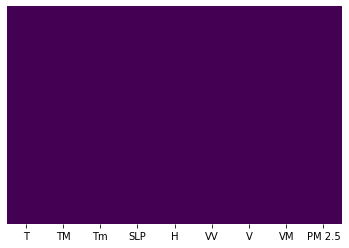

In [18]:
#Checking for null Values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [20]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2


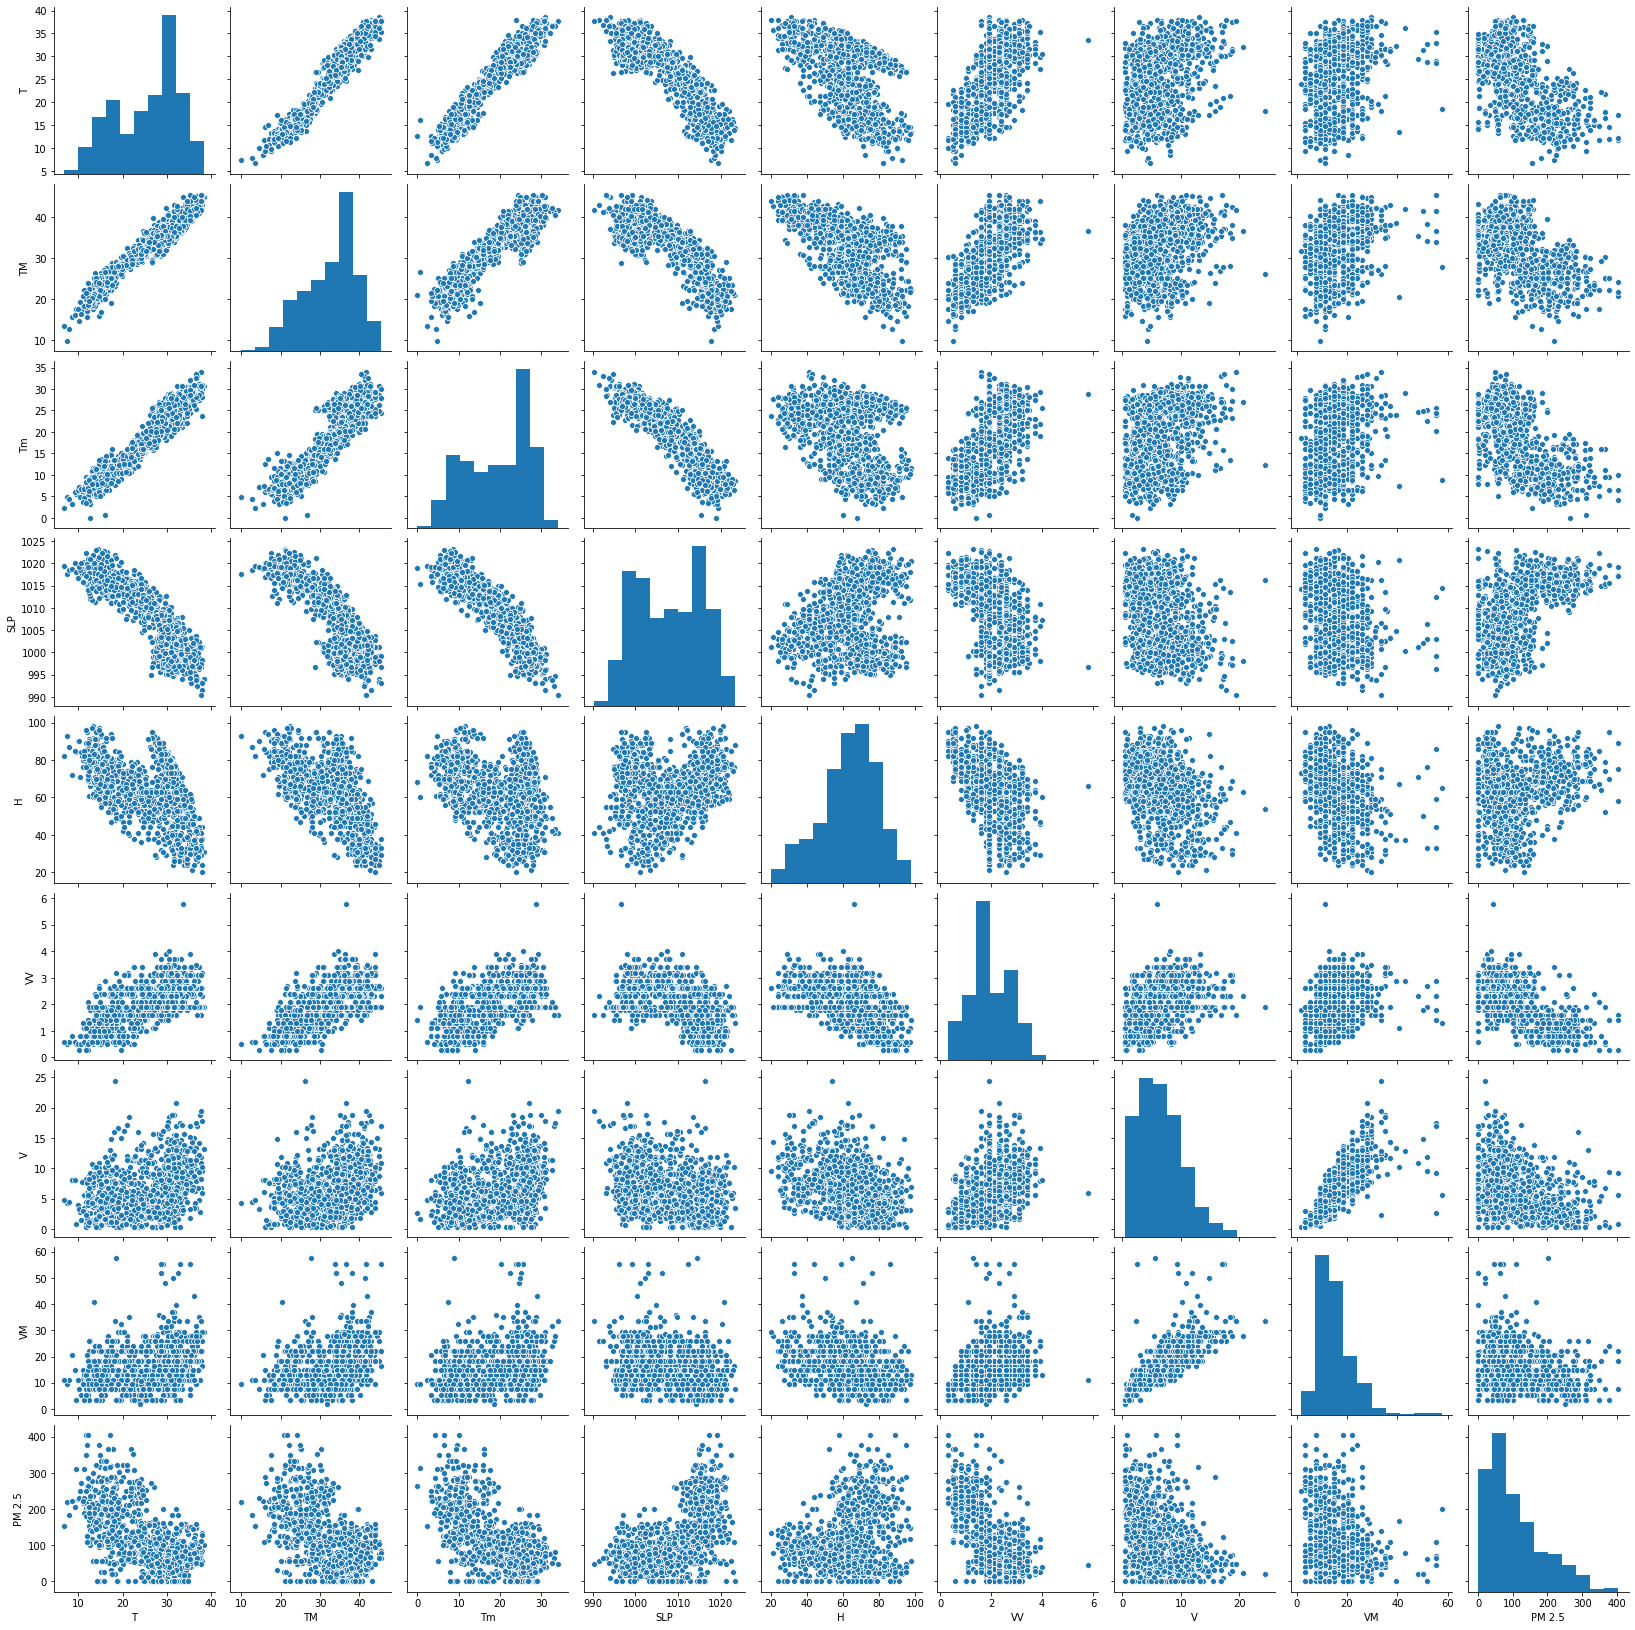

In [21]:
sns.pairplot(df)

In [22]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.963449,0.957201,-0.883486,-0.490205,0.625555,0.320452,0.277059,-0.628969
TM,0.963449,1.000000,0.889894,-0.826497,-0.578128,0.598582,0.303434,0.286205,-0.564433
Tm,0.957201,0.889894,1.000000,-0.912356,-0.276291,0.547673,0.312404,0.244846,-0.661353
SLP,-0.883486,-0.826497,-0.912356,1.000000,0.234018,-0.483668,-0.326082,-0.269664,0.604863
H,-0.490205,-0.578128,-0.276291,0.234018,1.000000,-0.489742,-0.356407,-0.369083,0.166341
VV,0.625555,0.598582,0.547673,-0.483668,-0.489742,1.000000,0.369990,0.326173,-0.593240
V,0.320452,0.303434,0.312404,-0.326082,-0.356407,0.369990,1.000000,0.780994,-0.327888
VM,0.277059,0.286205,0.244846,-0.269664,-0.369083,0.326173,0.780994,1.000000,-0.262803
PM 2.5,-0.628969,-0.564433,-0.661353,0.604863,0.166341,-0.593240,-0.327888,-0.262803,1.000000


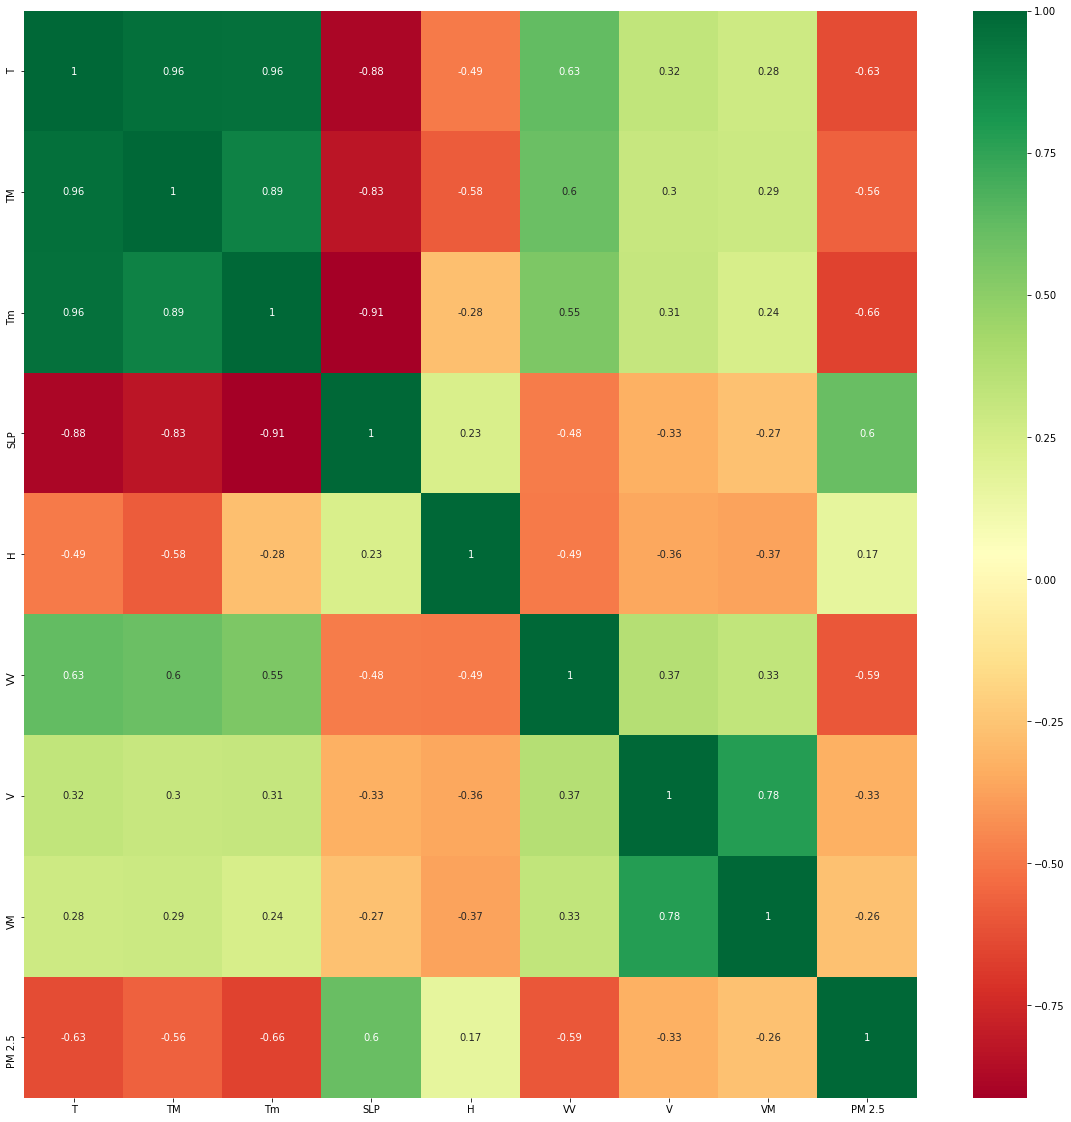

In [23]:
# Correlation using seaborn
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
# Tree Based regressor to find the top features
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

[0.17141904 0.09224314 0.19988881 0.14349094 0.07538056 0.20662507
 0.063226   0.04772643]


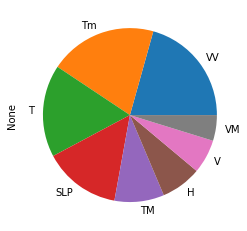

In [31]:
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='pie')
plt.show()

In [33]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Calculate R score for the model
# R score value for train should be closer to 1, 1 is for best linear regression model which fits properly all data
print("Coefficient of determination R^2 <-- on train set: {}".format(model.score(X_train, y_train)))

print("Coefficient of determination R^2 <-- on test set: {}".format(model.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5390885858109736
Coefficient of determination R^2 <-- on test set: 0.54743316879294


In [39]:
# Cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X,Y,cv=5)
score.mean()

0.49593788742500644

In [41]:
# feature wise coefficients
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,0.404560
TM,-0.274536
Tm,-5.093008
SLP,0.234740
H,-1.026317
VV,-45.471244
V,-0.812468
VM,-0.783197


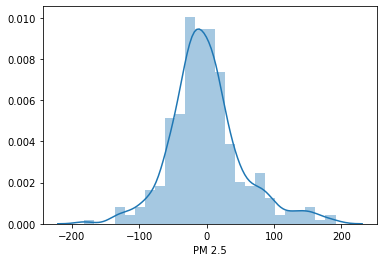

In [45]:
# Predicting test data
prediction=model.predict(X_test)
sns.distplot(y_test-prediction)
# If this curve comes out to be a bell curve then we can say that the model is giving a decent solution.

In [46]:
# Regression evaluation matrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 39.779762799686175
MSE: 2953.309685674336
RMSE: 54.34436204128572


In [47]:
# To save model
import pickle

file = open('LinearRegressionModel.pkl','wb')
pickle.dump(model, file)